## Investment Portfolio Analysis Part 3

In [2]:
#Load Packages

# 1.1. Load R packages 
library("tseries")
library("quantmod")
library("Quandl")
library("PortfolioAnalytics")
library("DEoptim")

# 1.2. Data Reading
data <- read.csv("Investment-Portfolio-Analysis-Data.txt",header=T)
data <- xts(data[,2:30],order.by=as.Date(data[,1]))
head(data)

            mcash   mbonds  msbonds  mlbonds  mibonds  mstocks mlstocks
2007-01-31 109.00 7.160662 8.528708 6.476980 7.589386 29.04660 109.4419
2007-02-28 109.12 7.268778 8.608584 6.666734 7.758039 28.57824 107.2868
2007-03-31 109.28 7.270352 8.632868 6.591707 7.782285 28.89504 108.4799
2007-04-30 109.40 7.307607 8.673239 6.648708 7.870720 30.05387 113.2724
2007-05-31 109.58 7.250820 8.638874 6.520618 7.730698 31.16231 117.2110
2007-06-30 109.64 7.223215 8.670263 6.463231 7.689753 30.64043 115.2484
           msstocks mgstocks mvstocks mistocks mdstocks mestocks  moil mgold
2007-01-31 29.46211 17.77470 14.38522 13.79684 33.95412 19.32504 48.24 64.83
2007-02-28 29.42683 17.84074 14.30250 13.80458 34.06837 19.07677 51.18 66.48
2007-03-31 29.78501 18.16343 14.38777 14.19126 35.01281 19.86162 53.35 65.74
2007-04-30 30.57905 18.80505 14.65268 14.74808 36.38494 20.70254 51.24 67.09
2007-05-31 31.92890 19.76747 15.19077 15.20437 37.19434 21.93588 48.96 65.54
2007-06-30 31.41719 19.62594 14.80

In [3]:
#  U.S. Total Money Market
cash <- data[,1]
mcash <- monthlyReturn(cash,type="arithmetic") ##create monthly return column
colnames(mcash) <- "mcash"
# U.S. Total Bond Market
bonds <- data[,2]
mbonds <- monthlyReturn(bonds,type="arithmetic")       ##create monthly return column
colnames(mbonds) <- "mbonds"

# U.S. Short Term Bond Market 
sbonds <- data[,3]
msbonds <- monthlyReturn(sbonds,type="arithmetic")     ##create monthly return column
colnames(msbonds) <- "msbonds"

# U.S. Long Term Bond Market 
lbonds <- data[,4]
mlbonds <- monthlyReturn(lbonds,type="arithmetic")    ##create monthly return column
colnames(mlbonds) <- "mlbonds"

# International Total Bond Market 
ibonds <- data[,5]
mibonds <- monthlyReturn(ibonds,type="arithmetic")    ##create monthly return column
colnames(mibonds) <- "mibonds"
# U.S. Total Stock Market
stocks <- data[,6]
mstocks <- monthlyReturn(stocks,type="arithmetic")   ##create monthly return column
colnames(mstocks) <- "mstocks"

# U.S. Large Cap Stock Market
lstocks <- data[,7]
mlstocks <- monthlyReturn(lstocks,type="arithmetic")    ##create monthly return column
colnames(mlstocks) <- "mlstocks"

# U.S. Small Cap Stock Market 
sstocks <- data[,8]
msstocks <- monthlyReturn(sstocks,type="arithmetic")    ##create monthly return column
colnames(msstocks) <- "msstocks"

#  U.S. Small Cap Growth Stock Market
gstocks <- data[,9]
mgstocks <- monthlyReturn(gstocks,type="arithmetic")    ##create monthly return column
colnames(mgstocks) <- "mgstocks"

# U.S. Small Cap Value Stock Market 
vstocks <- data[,10]
mvstocks <- monthlyReturn(vstocks,type="arithmetic")    ##create monthly return column
colnames(mvstocks) <- "mvstocks"

# International Total Stock Market
istocks <- data[,11]
mistocks <- monthlyReturn(istocks,type="arithmetic")     ##create monthly return column
colnames(mistocks) <- "mistocks"

#  International Developed Stock Market 
dstocks <- data[,12]
mdstocks <- monthlyReturn(dstocks,type="arithmetic")    ##create monthly return column
colnames(mdstocks) <- "mdstocks"

# International Emerging Stock Market 
estocks <- data[,13]
mestocks <- monthlyReturn(estocks,type="arithmetic")    ##create monthly return column
colnames(mestocks) <- "mestocks"
#  United States Oil Fund
oil <- data[,14]
moil <- monthlyReturn(oil,type="arithmetic")
colnames(moil) <- "moil"

# U.S. Real Estate Investment Trust
reit <- data[,16]
mreit <- monthlyReturn(reit,type="arithmetic")     #REIT shouldn't be here, but it is
colnames(mreit) <- "mreit"


# USD Major Currencies Index 
usd <- data[,17]
musd <- monthlyReturn(usd,type="arithmetic")   #Currency shouldn't be here, but it is
colnames(musd) <- "musd"


#  Gold Shares
gold <- data[,15]
mgold <- monthlyReturn(gold,type="arithmetic")
colnames(mgold) <- "mgold"

In [19]:
#  Standard Deviation
msd <- sd(mlstocks)

# Mean Absolute Deviation
mmad <- MeanAbsoluteDeviation(mlstocks)

#  Risk Metrics First Comparison
mriskcomp1 <- cbind(msd,mmad)


### Portfolio Leverage

[1] 2.648555

,mlstocks,mlstocks2x
Annualized Return,0.0656,0.0770
Annualized Std Dev,0.1528,0.3108
Annualized Sharpe (Rf=0%),0.4293,0.2476


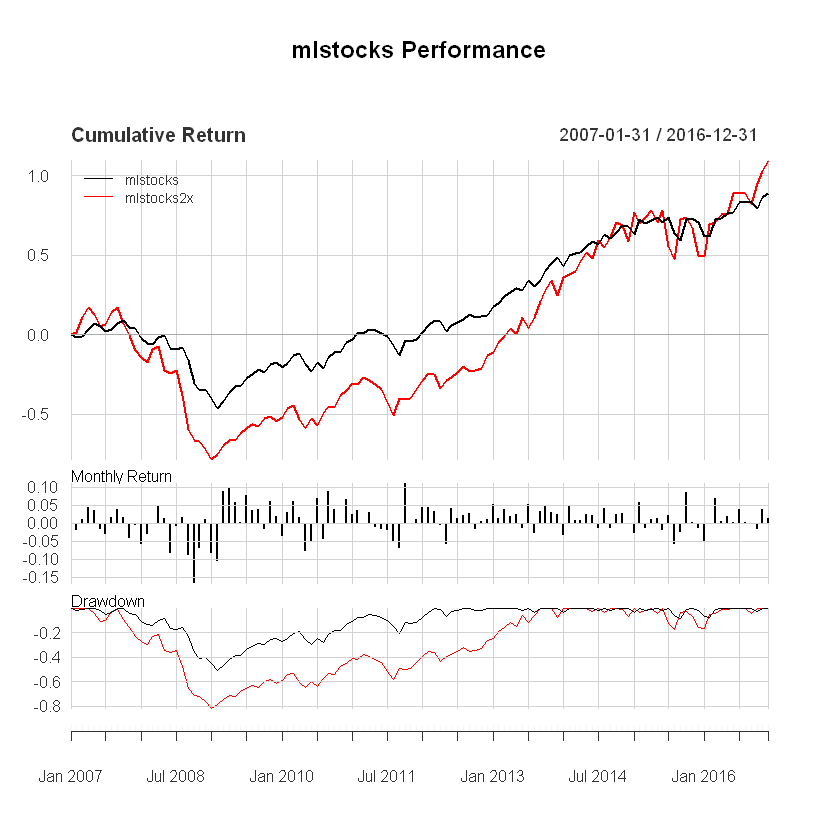

In [4]:
#  Maximum Leverage Calculation

# Maximum Annual Leverage Ratio 
alstocks <- yearlyReturn(stocks)
acash <- yearlyReturn(cash)
amaxlev <- 1/abs(min(alstocks)-max(acash))
amaxlev

#  U.S. Large Cap Stock Market 2x Daily Leverage 
lstocks2x <- data[,28]
mlstocks2x <- monthlyReturn(lstocks2x)
colnames(mlstocks2x) <- "mlstocks2x"

#  Leveraged Portfolios Returns Comparison
levcomp <- cbind(mlstocks, mlstocks2x)
table.AnnualizedReturns(levcomp)
charts.PerformanceSummary(levcomp)

## Portfolio Optimization

#### Portfolio Performance Metrics (Higher is better)

In [5]:
# Sharpe Ratio 
msharpe <- SharpeRatio(mlstocks,Rf=mean(mcash))
msharpe

#  Treynor Ratio
mtreynor <- TreynorRatio(Ra=mlstocks,Rb=mstocks,Rf=mean(mcash))
mtreynor

#  Sortino Ratio
msortino <- SortinoRatio(R=mlstocks,MAR=mean(mcash))
msortino

# Kelly Ratio
mkelly <- KellyRatio(R=mlstocks,Rf=mean(mcash),method="half")
mkelly

,mlstocks
"StdDev Sharpe (Rf=0%, p=95%):",0.14036123
"VaR Sharpe (Rf=0%, p=95%):",0.08502864
"ES Sharpe (Rf=0%, p=95%):",0.05678181


[1] 0.0666245

,mlstocks
Sortino Ratio (MAR = 0.01%),0.2021255


,mlstocks
Kelly Ratio,1.591474


#### Portfolio Benchmarks

,mnaive,mroche,mbogle
Annualized Return,0.0394,0.0364,0.0603
Annualized Std Dev,0.0995,0.0944,0.0954
Annualized Sharpe (Rf=0%),0.3961,0.3850,0.6316


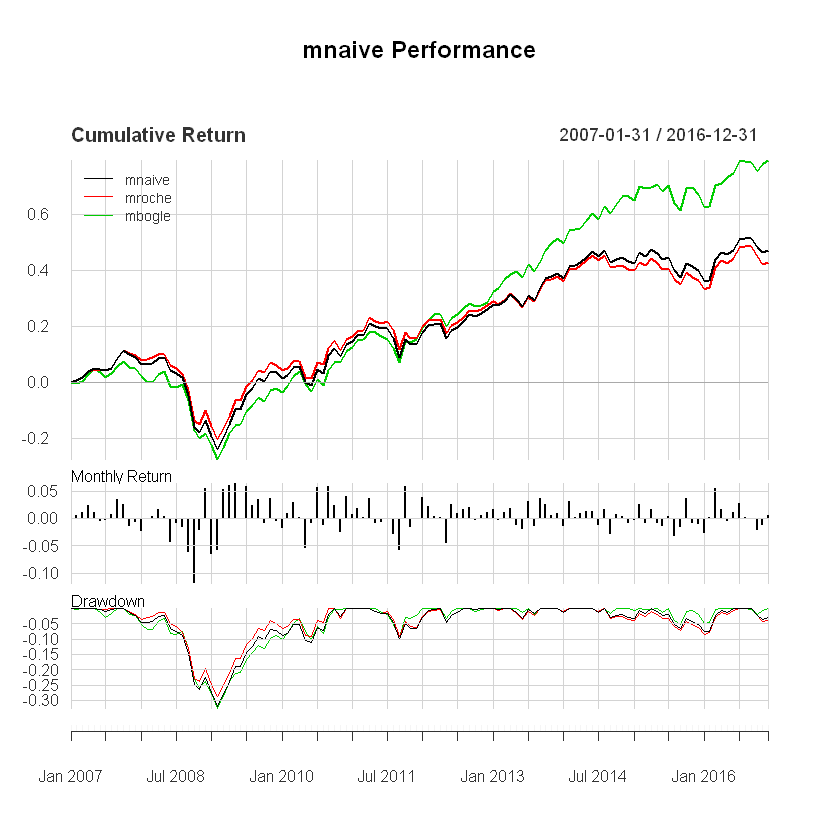

In [6]:
#  Portfolio Assets Returns Matrix
mport <- cbind(mbonds,mstocks,mibonds,mistocks)

#  Naive Global Portfolio (Monthly Rebalancing)
mnaivew <- as.numeric(t(c(0.25,0.25,0.25,0.25)))
names(mnaivew) <- c("mbonds","mstocks","mibonds","mistocks")
mnaive <- Return.portfolio(R=mport,weights=mnaivew,geometric=F,rebalance_on="months")
colnames(mnaive) <- "mnaive"

# Roche Global Portfolio (Monthly Rebalancing)
mrochew <- as.numeric(t(c(0.24,0.18,0.33,0.25)))
names(mrochew) <- c("mbonds","mstocks","mibonds","mistocks")
mroche <- Return.portfolio(R=mport,weights=mrochew,geometric=F,rebalance_on="months")
colnames(mroche) <- "mroche"

#  Bogle U.S. Portfolio (Monthly Rebalancing)
mboglew <- as.numeric(t(c(0.40,0.60,0.00,0.00)))
names(mboglew) <- c("mbonds","mstocks","mibonds","mistocks")
mbogle <- Return.portfolio(R=mport,weights=mboglew,geometric=F,rebalance_on="months")
colnames(mbogle) <- "mbogle"

# Benchmark Portfolios Returns Comparison
benchcomp <- cbind(mnaive, mroche, mbogle)
table.AnnualizedReturns(benchcomp)
charts.PerformanceSummary(benchcomp)

###  Portfolio Construction and Optimization

#### 1) Mean Maximization Portfolio

Iteration: 1 bestvalit: -0.006791 bestmemit:    0.000000    0.982000    0.002000    0.010000
Iteration: 2 bestvalit: -0.006816 bestmemit:    0.000000    0.980000    0.022000    0.000000
Iteration: 3 bestvalit: -0.006816 bestmemit:    0.000000    0.980000    0.022000    0.000000
Iteration: 4 bestvalit: -0.006816 bestmemit:    0.000000    0.980000    0.022000    0.000000
Iteration: 5 bestvalit: -0.006816 bestmemit:    0.000000    0.980000    0.022000    0.000000
Iteration: 6 bestvalit: -0.006831 bestmemit:    0.010000    0.982000    0.010000    0.000000
Iteration: 7 bestvalit: -0.006831 bestmemit:    0.010000    0.982000    0.010000    0.000000
Iteration: 8 bestvalit: -0.006831 bestmemit:    0.010000    0.982000    0.010000    0.000000
Iteration: 9 bestvalit: -0.006831 bestmemit:    0.010000    0.982000    0.010000    0.000000
Iteration: 10 bestvalit: -0.006831 bestmemit:    0.010000    0.982000    0.010000    0.000000
Iteration: 11 bestvalit: -0.006831 bestmemit:    0.010000    0.982000

,mnaive,mroche,mbogle,mport1
Annualized Return,0.0140,0.0092,0.0387,0.0558
Annualized Std Dev,0.0707,0.0685,0.0706,0.1190
Annualized Sharpe (Rf=0%),0.1981,0.1343,0.5480,0.4688


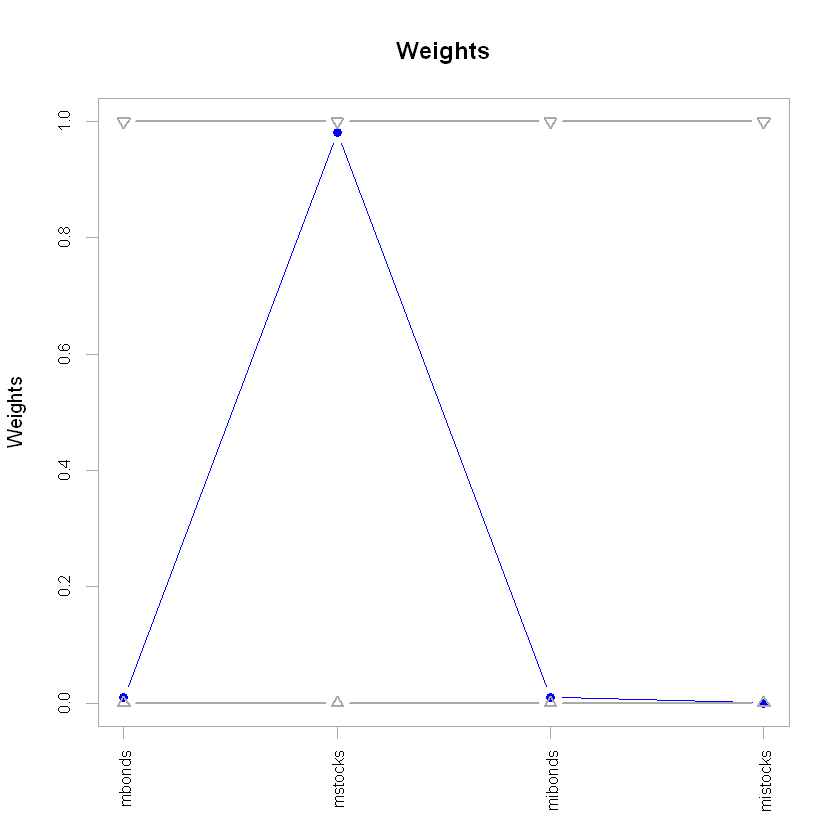

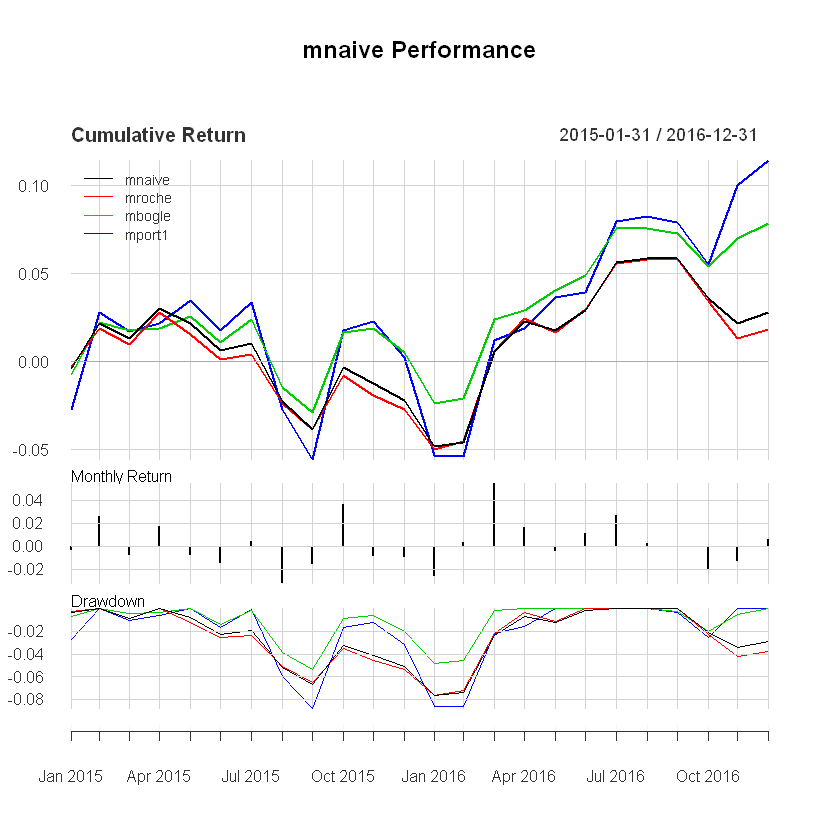

In [20]:
# Portfolio Specifications
mport1c <- portfolio.spec(assets = colnames(mport))

# Portfolio Constraints
mport1c <- add.constraint(mport1c,type="weight_sum",min_sum=0.99,max_sum=1.01)
mport1c <- add.constraint(mport1c,type="long_only")

# Portfolio Objectives
mport1c <- add.objective(mport1c,type="return",name="mean")

# Portfolio Optimization
mportopt1 <- optimize.portfolio(R=mport["::2014-12-31"],portfolio=mport1c,optimize_method="DEoptim",search_size=20000,trace=T)
chart.Weights(mportopt1)

# Portfolio Backtesting (Monthly Rebalancing)
mport1 <- Return.portfolio(R=mport["2015-01-31::"],weights=extractWeights(mportopt1),geometric=F,rebalance_on="months")
colnames(mport1) <- "mport1"
mportcomp1 <- cbind(mnaive["2015-01-31::"],mroche["2015-01-31::"],mbogle["2015-01-31::"],mport1)
table.AnnualizedReturns(mportcomp1)
charts.PerformanceSummary(mportcomp1)

#### 2) Standard Deviation Minimization Portfolio

Iteration: 1 bestvalit: 0.010077 bestmemit:    0.944000    0.022000    0.010000    0.032000
Iteration: 2 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
Iteration: 3 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
Iteration: 4 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
Iteration: 5 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
Iteration: 6 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
Iteration: 7 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
Iteration: 8 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
Iteration: 9 bestvalit: 0.009643 bestmemit:    0.976000    0.008000    0.002000    0.010000
[1] 0.976 0.008 0.002 0.010


,mnaive,mroche,mbogle,mport2
Annualized Return,0.0140,0.0092,0.0387,0.0073
Annualized Std Dev,0.0707,0.0685,0.0706,0.0354
Annualized Sharpe (Rf=0%),0.1981,0.1343,0.5480,0.2062


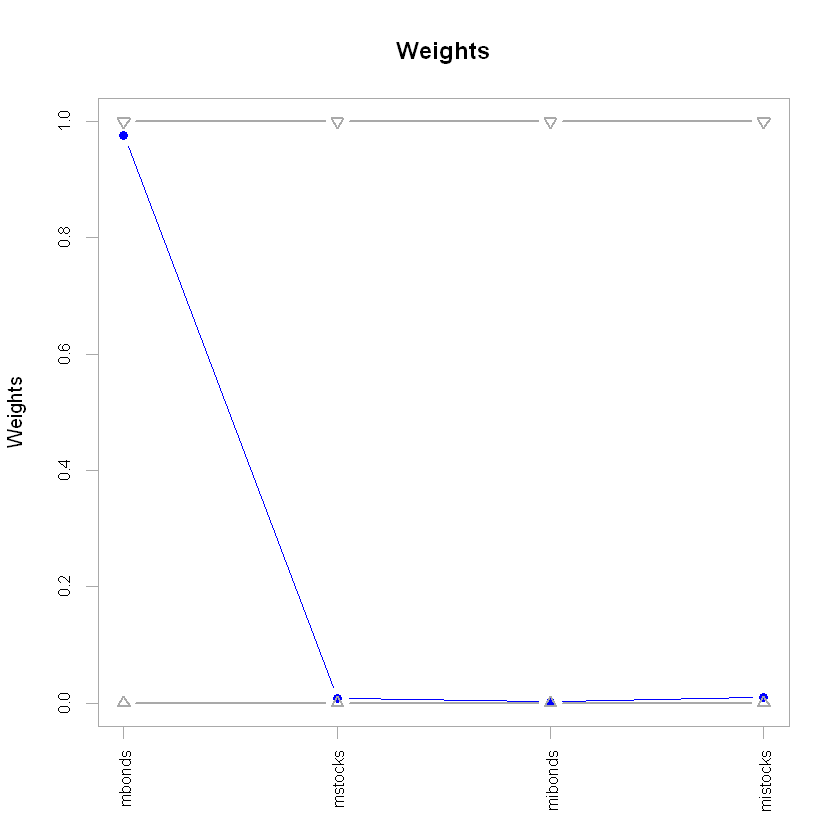

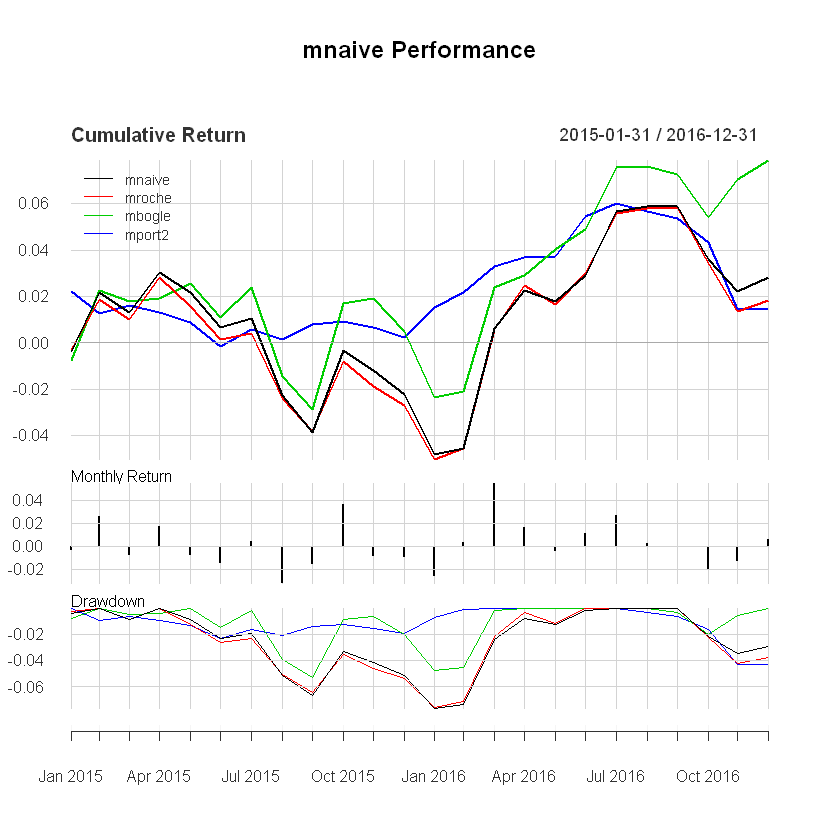

In [21]:
# Portfolio Specifications
mport2c <- portfolio.spec(assets=colnames(mport))

# Portfolio Constraints
mport2c <- add.constraint(mport2c,type="weight_sum",min_sum=0.99,max_sum=1.01)
mport2c <- add.constraint(mport2c,type="long_only")

# Portfolio Objectives
mport2c <- add.objective(mport2c,type="risk",name="StdDev")

# Portfolio Optimization
mportopt2 <- optimize.portfolio(R=mport["::2014-12-31"],portfolio=mport2c,optimize_method="DEoptim",search_size=20000,trace=T)
chart.Weights(mportopt2)

# Portfolio Backtesting (Monthly Rebalancing)
mport2 <- Return.portfolio(R=mport["2015-01-31::"],weights=extractWeights(mportopt2),geometric=F,rebalance_on="months")
colnames(mport2) <- "mport2"
mportcomp2 <- cbind(mnaive["2015-01-31::"],mroche["2015-01-31::"],mbogle["2015-01-31::"],mport2)
table.AnnualizedReturns(mportcomp2)
charts.PerformanceSummary(mportcomp2)

#### 3) Mean Maximization and Standard Deviation Minimization Portfolio

Iteration: 1 bestvalit: 0.005551 bestmemit:    0.914000    0.054000    0.024000    0.000000
Iteration: 2 bestvalit: 0.005551 bestmemit:    0.914000    0.054000    0.024000    0.000000
Iteration: 3 bestvalit: 0.005551 bestmemit:    0.914000    0.054000    0.024000    0.000000
Iteration: 4 bestvalit: 0.005551 bestmemit:    0.914000    0.054000    0.024000    0.000000
Iteration: 5 bestvalit: 0.005551 bestmemit:    0.914000    0.054000    0.024000    0.000000
Iteration: 6 bestvalit: 0.005551 bestmemit:    0.914000    0.054000    0.024000    0.000000
Iteration: 7 bestvalit: 0.005551 bestmemit:    0.914000    0.054000    0.024000    0.000000
[1] 0.914 0.054 0.024 0.000


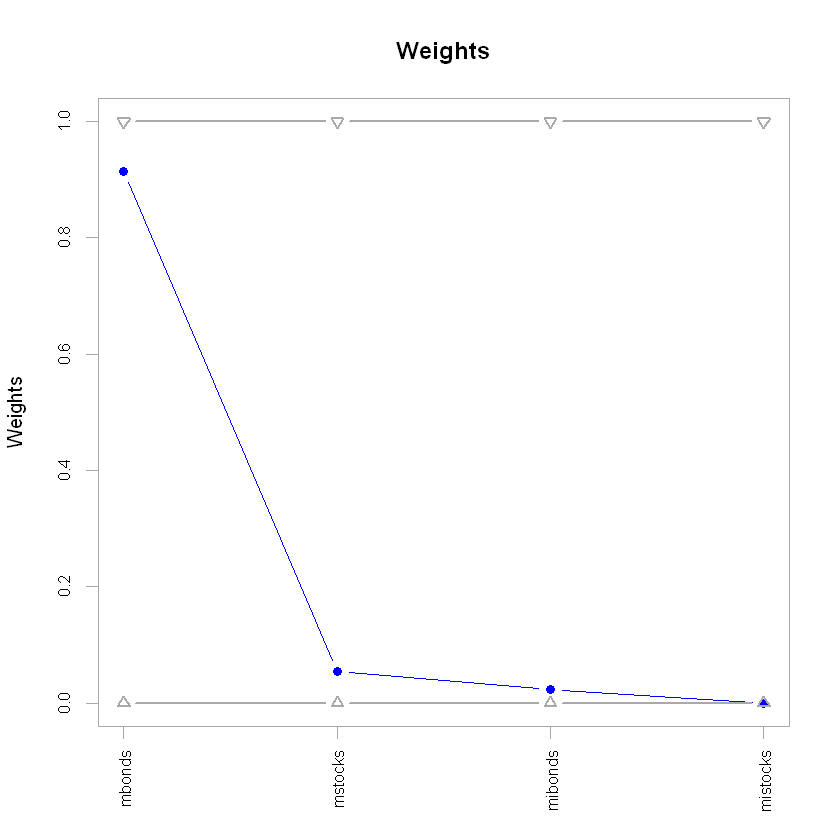

,mnaive,mroche,mbogle,mport3
Annualized Return,0.0140,0.0092,0.0387,0.0096
Annualized Std Dev,0.0707,0.0685,0.0706,0.0334
Annualized Sharpe (Rf=0%),0.1981,0.1343,0.5480,0.2884


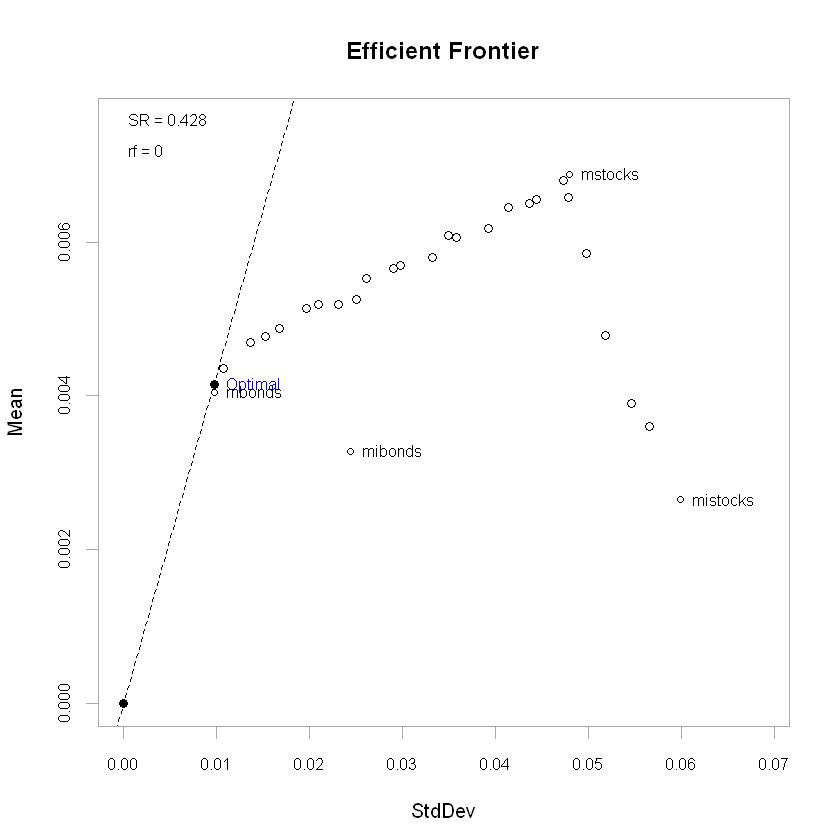

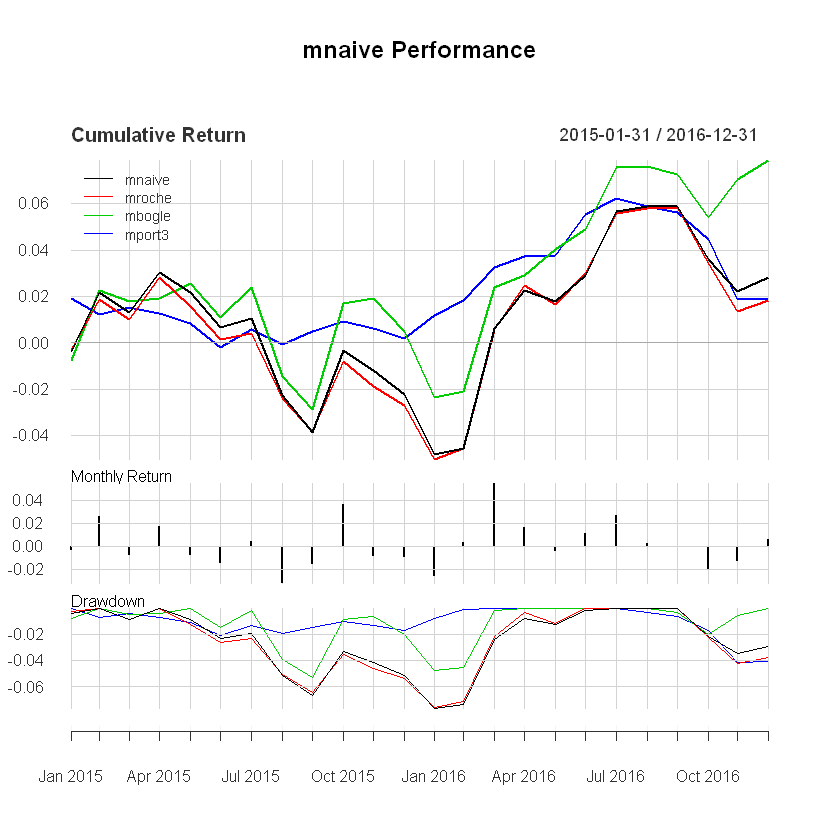

In [22]:
# Portfolio Specifications
mport3c <- portfolio.spec(assets=colnames(mport))

# Portfolio Constraints
mport3c <- add.constraint(mport3c,type="weight_sum",min_sum=0.99,max_sum=1.01)
mport3c <- add.constraint(mport3c,type="long_only")

# Portfolio Objectives
mport3c <- add.objective(mport3c,type="return",name="mean")
mport3c <- add.objective(mport3c,type="risk",name="StdDev")

# Portfolio Optimization
mportopt3 <- optimize.portfolio(R=mport["::2014-12-31"],portfolio=mport3c,optimize_method="DEoptim",search_size=20000,trace=T)
chart.Weights(mportopt3)
chart.EfficientFrontier(mportopt3,match.col="StdDev")

# Portfolio Backtesting (Monthly Rebalancing)
mport3 <- Return.portfolio(R=mport["2015-01-31::"],weights=extractWeights(mportopt3),geometric=F,rebalance_on="months")
colnames(mport3) <- "mport3"
mportcomp3 <- cbind(mnaive["2015-01-31::"],mroche["2015-01-31::"],mbogle["2015-01-31::"],mport3)
table.AnnualizedReturns(mportcomp3)
charts.PerformanceSummary(mportcomp3)

#### 4) Mean Maximization Value at Risk (VaR) Minimization Portfolio

Iteration: 1 bestvalit: 0.019094 bestmemit:    0.964000    0.000000    0.030000    0.014000
Iteration: 2 bestvalit: 0.018049 bestmemit:    0.978000    0.002000    0.014000    0.008000
Iteration: 3 bestvalit: 0.018049 bestmemit:    0.978000    0.002000    0.014000    0.008000
Iteration: 4 bestvalit: 0.018049 bestmemit:    0.978000    0.002000    0.014000    0.008000
Iteration: 5 bestvalit: 0.018049 bestmemit:    0.978000    0.002000    0.014000    0.008000
Iteration: 6 bestvalit: 0.018049 bestmemit:    0.978000    0.002000    0.014000    0.008000
Iteration: 7 bestvalit: 0.016850 bestmemit:    0.982000    0.004000    0.004000    0.000000
Iteration: 8 bestvalit: 0.016850 bestmemit:    0.982000    0.004000    0.004000    0.000000
Iteration: 9 bestvalit: 0.016850 bestmemit:    0.982000    0.004000    0.004000    0.000000
Iteration: 10 bestvalit: 0.016850 bestmemit:    0.982000    0.004000    0.004000    0.000000
Iteration: 11 bestvalit: 0.016850 bestmemit:    0.982000    0.004000    0.00400

,mnaive,mroche,mbogle,mport4
Annualized Return,0.0140,0.0092,0.0387,0.0071
Annualized Std Dev,0.0707,0.0685,0.0706,0.0358
Annualized Sharpe (Rf=0%),0.1981,0.1343,0.5480,0.1976


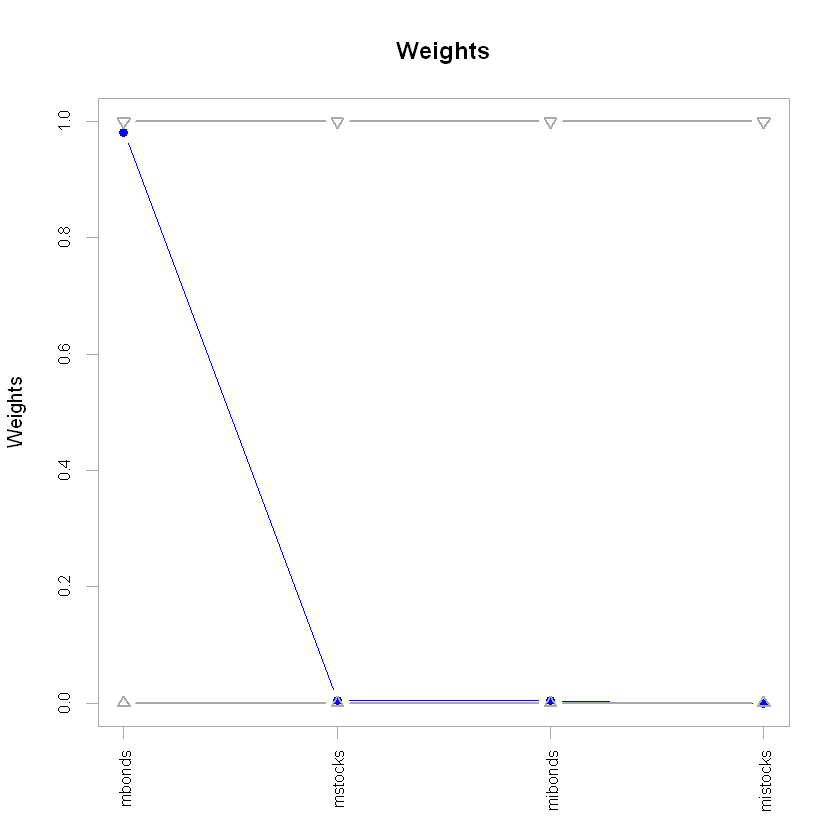

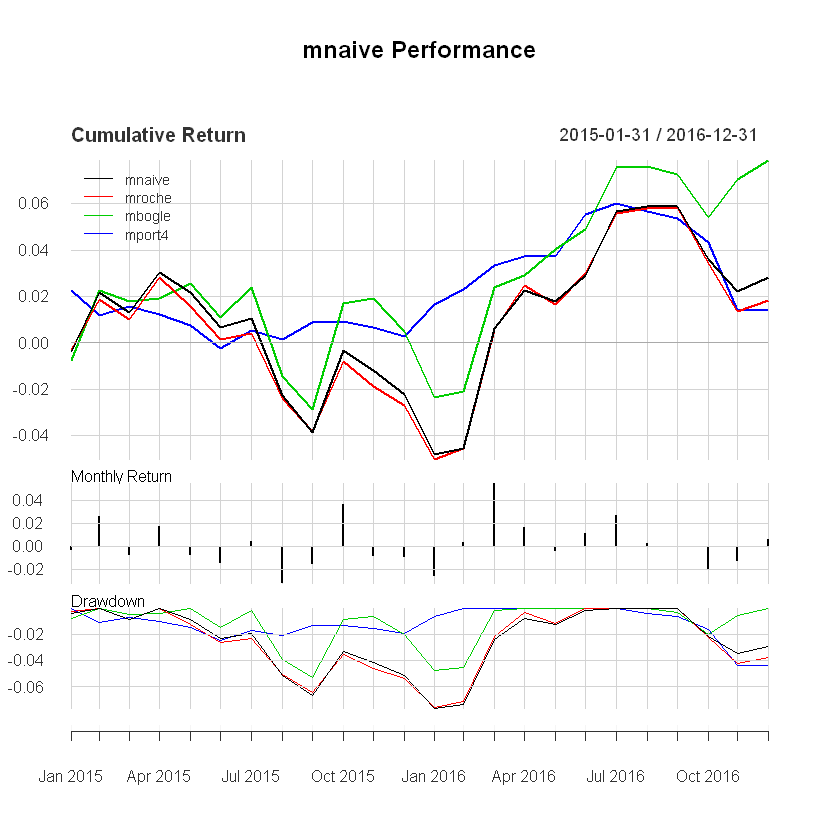

In [23]:
# Portfolio Specifications
mport4c <- portfolio.spec(assets=colnames(mport))

# Portfolio Constraints
mport4c <- add.constraint(mport4c,type="weight_sum",min_sum=0.99,max_sum=1.01)
mport4c <- add.constraint(mport4c,type="long_only")

# Portfolio Objectives
mport4c <- add.objective(mport4c,type="return",name="mean")
mport4c <- add.objective(mport4c,type="risk",name="VaR",arguments=list(p = 0.99,method="modified"))

# Portfolio Optimization
mportopt4 <- optimize.portfolio(R=mport["::2014-12-31"],portfolio=mport4c,optimize_method="DEoptim",search_size=20000,trace=T)
chart.Weights(mportopt4)

# Portfolio Backtesting (Monthly Rebalancing)
mport4 <- Return.portfolio(R=mport["2015-01-31::"],weights=extractWeights(mportopt4),geometric=F,rebalance_on="months")
colnames(mport4) <- "mport4"
mportcomp4 <- cbind(mnaive["2015-01-31::"],mroche["2015-01-31::"],mbogle["2015-01-31::"],mport4)
table.AnnualizedReturns(mportcomp4)
charts.PerformanceSummary(mportcomp4)

#### Compare all portfolio construction

,mnaive,mport1,mport2,mport3,mport4
Annualized Return,0.0140,0.0558,0.0073,0.0096,0.0071
Annualized Std Dev,0.0707,0.1190,0.0354,0.0334,0.0358
Annualized Sharpe (Rf=0%),0.1981,0.4688,0.2062,0.2884,0.1976


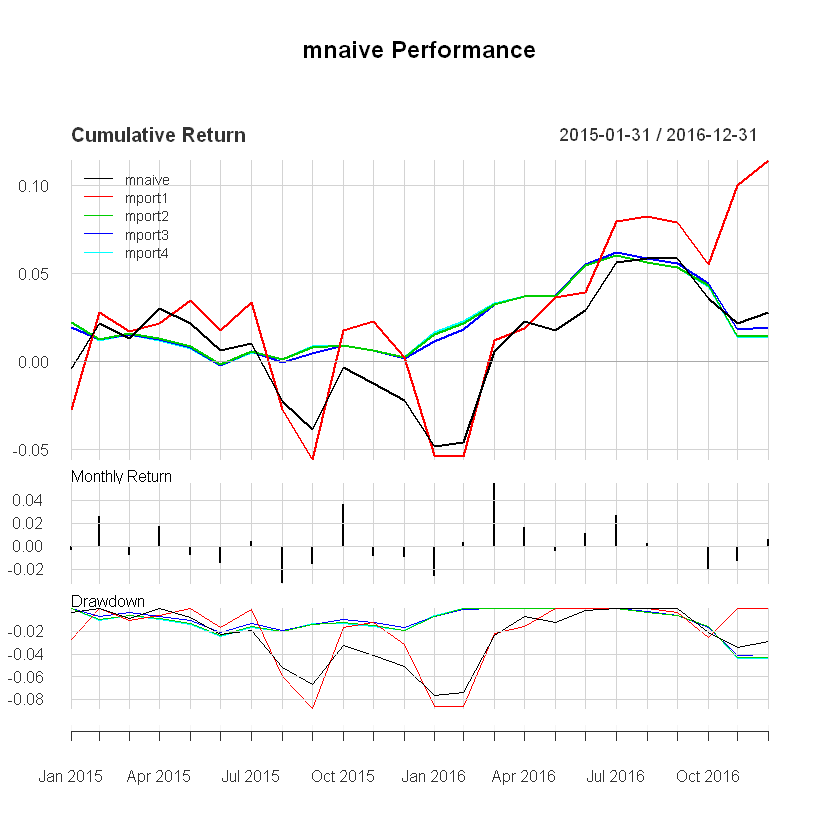

In [24]:
# Optimized Portfolios Backtesting Comparison
mportcomp = cbind(mnaive["2015-01-31::"],mport1,mport2,mport3,mport4)
table.AnnualizedReturns(mportcomp)
charts.PerformanceSummary(mportcomp)

## Portfolio Performance

In [26]:
# Risk Metrics
cpi <- data[,24]
mcpi <- monthlyReturn(cpi)
colnames(mcpi) <- "mcpi"
mmom <- data[,19]/100
msprem <- data[,20]/100
msize <- data[,21]/100
mstyle <- data[,22]/100
mrisk <- data[,23]/100
mlsprem <- mlstocks-mrisk

In [27]:
# Portfolio Performance Data
misprem <- data[,29]/100
mterm <- mlbonds-mrisk
mfactp <- cbind(msprem,misprem,mterm) 
colnames(mfactp) <- c("msprem","misprem","mterm")
mfactp <- mfactp["2015-01-31::"]

#### Mean Maximization Portfolio Performance

In [28]:
# Mean Maximization Portfolio Factors Regressions
extractWeights(mportopt1)
mpprem1 <- mport1-mrisk["2015-01-31::"]
mregp1 <- lm(mpprem1~mfactp)
summary(mregp1)

mfactp1 <- cbind(mfactp[,1],mfactp[,3])
colnames(mfactp1) <- c("msprem","mterm")
mregp1f <- lm(mpprem1~mfactp1)
summary(mregp1f)

mbonds  mstocks  mibonds mistocks 
   0.010    0.982    0.010    0.000


Call:
lm(formula = mpprem1 ~ mfactp)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0040538 -0.0007214 -0.0001143  0.0009814  0.0022793 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.0007425  0.0003339  -2.224   0.0379 *  
mfactpmsprem   0.9961569  0.0172353  57.797  < 2e-16 ***
mfactpmisprem -0.0131839  0.0152755  -0.863   0.3983    
mfactpmterm    0.0527003  0.0093271   5.650 1.57e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001589 on 20 degrees of freedom
Multiple R-squared:  0.9981,	Adjusted R-squared:  0.9979 
F-statistic:  3571 on 3 and 20 DF,  p-value: < 2.2e-16



Call:
lm(formula = mpprem1 ~ mfactp1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0042963 -0.0004595  0.0001816  0.0008921  0.0021262 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.0006945  0.0003272  -2.122   0.0459 *  
mfactp1msprem  0.9840715  0.0099876  98.529  < 2e-16 ***
mfactp1mterm   0.0516253  0.0091873   5.619 1.41e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00158 on 21 degrees of freedom
Multiple R-squared:  0.9981,	Adjusted R-squared:  0.9979 
F-statistic:  5423 on 2 and 21 DF,  p-value: < 2.2e-16


#### Mean Maximization Portfolio Expected Returns

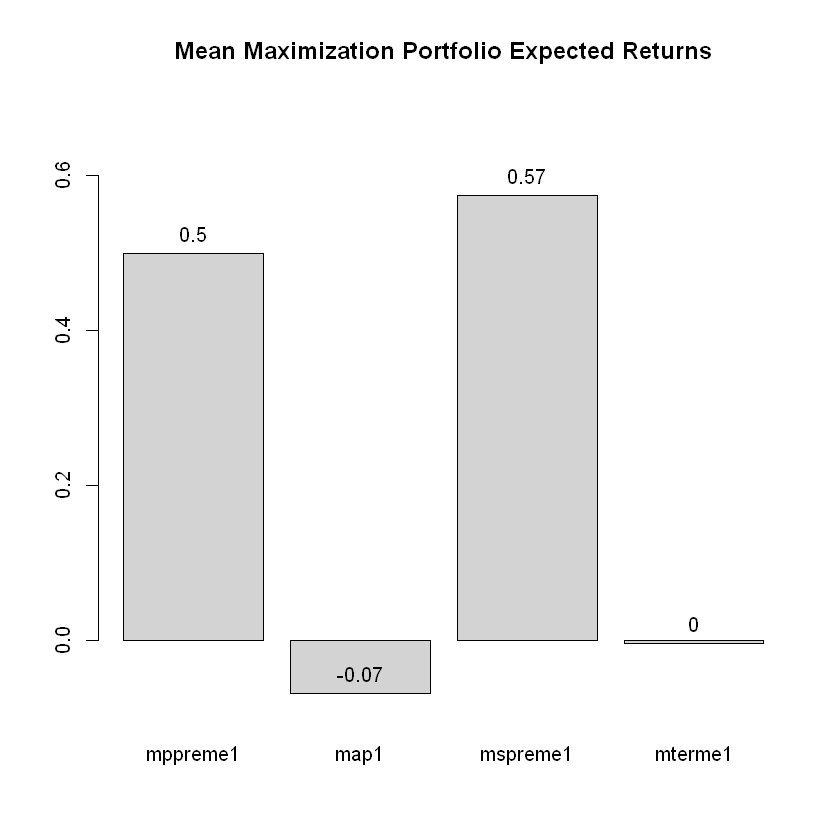

In [29]:
map1 <- summary(mregp1f)$coefficients[1]
mspreme1 <- summary(mregp1f)$coefficients[2]*mean(mfactp1[,1])
mterme1 <- summary(mregp1f)$coefficients[3]*mean(mfactp1[,2])
mppreme1 <- map1+mspreme1+mterme1

mportcompe1 <- cbind(mppreme1,map1,mspreme1,mterme1)
colnames(mportcompe1) <- c("mppreme1","map1","mspreme1","mterme1")

mportcompb1 <- mportcompe1*100
bp1 <- barplot(mportcompb1,main="Mean Maximization Portfolio Expected Returns",col="lightgray",ylim=c(-0.1,0.7))
text(bp1,mportcompb1,labels=round(mportcompb1,2),pos=3)

#### Standard Deviation Minimization Portfolio Performance

mbonds  mstocks  mibonds mistocks 
   0.976    0.008    0.002    0.010


Call:
lm(formula = mpprem2 ~ mfactp)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0041758 -0.0013244 -0.0002903  0.0013825  0.0060063 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0009421  0.0006130   1.537  0.14003    
mfactpmsprem  -0.0524910  0.0316445  -1.659  0.11276    
mfactpmisprem  0.1014480  0.0280463   3.617  0.00172 ** 
mfactpmterm    0.2517320  0.0171249  14.700 3.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002918 on 20 degrees of freedom
Multiple R-squared:  0.9292,	Adjusted R-squared:  0.9185 
F-statistic: 87.45 on 3 and 20 DF,  p-value: 1.138e-11



Call:
lm(formula = mpprem2 ~ mfactp2)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0059145 -0.0017148  0.0005031  0.0013957  0.0052350 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0007062  0.0006207   1.138  0.26803    
mfactp2misprem 0.0636512  0.0170203   3.740  0.00121 ** 
mfactp2mterm   0.2609586  0.0168583  15.480 5.86e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003038 on 21 degrees of freedom
Multiple R-squared:  0.9194,	Adjusted R-squared:  0.9118 
F-statistic: 119.8 on 2 and 21 DF,  p-value: 3.275e-12


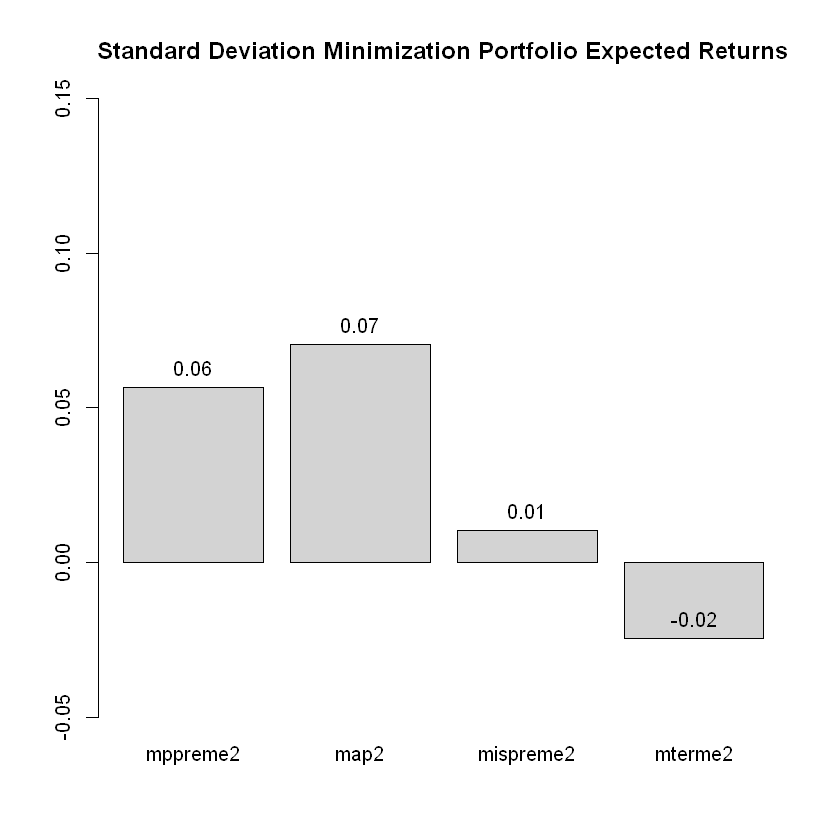

In [30]:
# Standard Deviation Minimization Portfolio Factors Regression
extractWeights(mportopt2)
mpprem2 <- mport2-mrisk["2015-01-31::"]
mregp2 <- lm(mpprem2~mfactp)
summary(mregp2)

mfactp2 <- cbind(mfactp[,2],mfactp[,3])
colnames(mfactp2) <- c("misprem","mterm")
mregp2f <- lm(mpprem2~mfactp2)
summary(mregp2f)

# Standard Deviation Minimization Portfolio Expected Returns
map2 <- summary(mregp2f)$coefficients[1]
mispreme2 <- summary(mregp2f)$coefficients[2]*mean(mfactp2[,1])
mterme2 <- summary(mregp2f)$coefficients[3]*mean(mfactp2[,2])
mppreme2 <- map2+mispreme2+mterme2

mportcompe2 <- cbind(mppreme2,map2,mispreme2,mterme2)
colnames(mportcompe2) <- c("mppreme2","map2","mispreme2","mterme2")

mportcompb2 <- mportcompe2*100
bp2 <- barplot(mportcompb2,main="Standard Deviation Minimization Portfolio Expected Returns",col="lightgray",ylim=c(-0.05,0.15))
text(bp2,mportcompb2,labels=round(mportcompb2,2),pos=3)

#### Mean Maximization and Standard Deviation Minimization Portfolio Performance

mbonds  mstocks  mibonds mistocks 
   0.914    0.054    0.024    0.000


Call:
lm(formula = mpprem3 ~ mfactp)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0038694 -0.0013452 -0.0000882  0.0013735  0.0063395 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0008652  0.0006078   1.423   0.1700    
mfactpmsprem  -0.0070730  0.0313742  -0.225   0.8239    
mfactpmisprem  0.0960748  0.0278067   3.455   0.0025 ** 
mfactpmterm    0.2429503  0.0169786  14.309 5.72e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002893 on 20 degrees of freedom
Multiple R-squared:  0.9218,	Adjusted R-squared:   0.91 
F-statistic: 78.54 on 3 and 20 DF,  p-value: 3.067e-11



Call:
lm(formula = mpprem3 ~ mfactp3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.003959 -0.001436 -0.000043  0.001372  0.006235 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0008334  0.0005777   1.443    0.164    
mfactp3misprem 0.0909818  0.0158417   5.743 1.06e-05 ***
mfactp3mterm   0.2441936  0.0156909  15.563 5.28e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002827 on 21 degrees of freedom
Multiple R-squared:  0.9216,	Adjusted R-squared:  0.9141 
F-statistic: 123.4 on 2 and 21 DF,  p-value: 2.47e-12


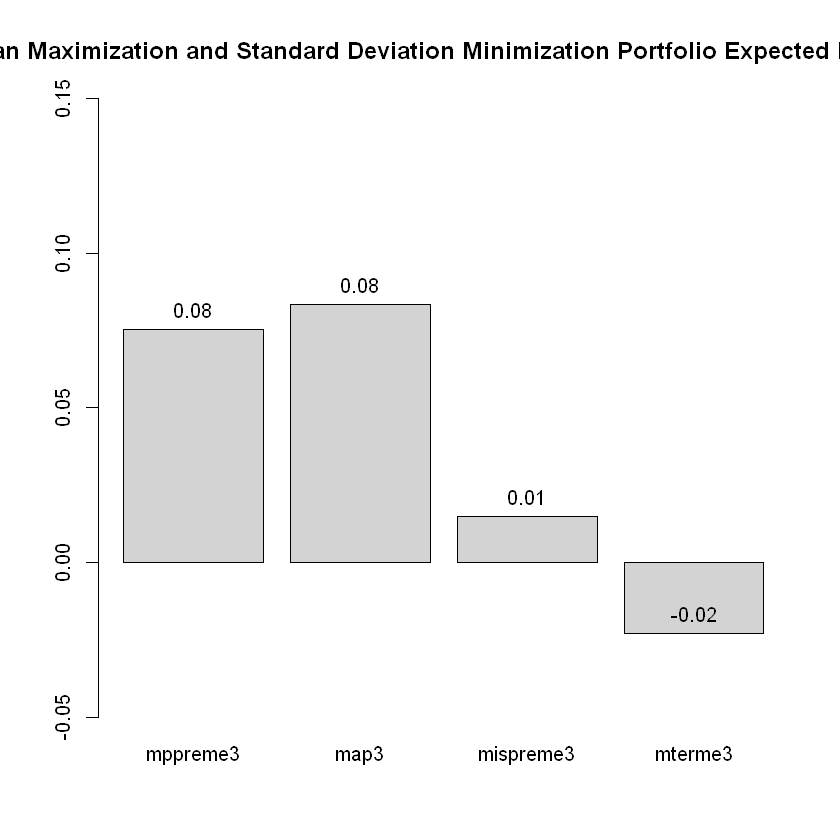

In [31]:
#  Mean Maximization and Standard Deviation Minimization Portfolio Factors Regression
extractWeights(mportopt3)
mpprem3 <- mport3-mrisk["2015-01-31::"]
mregp3 <- lm(mpprem3~mfactp)
summary(mregp3)

mfactp3 <- cbind(mfactp[,2],mfactp[,3])
colnames(mfactp3) <- c("misprem","mterm")
mregp3f <- lm(mpprem3~mfactp3)
summary(mregp3f)

# Mean Maximization and Standard Deviation Minimization Portfolio Expected Returns
map3 <- summary(mregp3f)$coefficients[1]
mispreme3 <- summary(mregp3f)$coefficients[2]*mean(mfactp3[,1])
mterme3 <- summary(mregp3f)$coefficients[3]*mean(mfactp3[,2])
mppreme3 <- map3+mispreme3+mterme3

mportcompe3 <- cbind(mppreme3,map3,mispreme3,mterme3)
colnames(mportcompe3) <- c("mppreme3","map3","mispreme3","mterme3")

mportcompb3 <- mportcompe3*100
bp3 <- barplot(mportcompb3,main="Mean Maximization and Standard Deviation Minimization Portfolio Expected Returns",col="lightgray",ylim=c(-0.05,0.15))
text(bp3,mportcompb3,labels=round(mportcompb3,2),pos=3)

#### Mean Maximization and VaR Minimization Portfolio Performance

mbonds  mstocks  mibonds mistocks 
   0.982    0.004    0.004    0.000


Call:
lm(formula = mpprem4 ~ mfactp)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0041460 -0.0013514 -0.0002471  0.0013788  0.0059678 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0009713  0.0006120   1.587  0.12821    
mfactpmsprem  -0.0585567  0.0315922  -1.854  0.07862 .  
mfactpmisprem  0.0943057  0.0279999   3.368  0.00306 ** 
mfactpmterm    0.2527993  0.0170966  14.787 3.13e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002913 on 20 degrees of freedom
Multiple R-squared:  0.9307,	Adjusted R-squared:  0.9203 
F-statistic: 89.54 on 3 and 20 DF,  p-value: 9.142e-12



Call:
lm(formula = mpprem4 ~ mfactp4)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0062260 -0.0017588  0.0006012  0.0014194  0.0052812 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0007081  0.0006289   1.126  0.27289    
mfactp4misprem 0.0521411  0.0172457   3.023  0.00647 ** 
mfactp4mterm   0.2630921  0.0170815  15.402 6.45e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003078 on 21 degrees of freedom
Multiple R-squared:  0.9188,	Adjusted R-squared:  0.9111 
F-statistic: 118.8 on 2 and 21 DF,  p-value: 3.55e-12


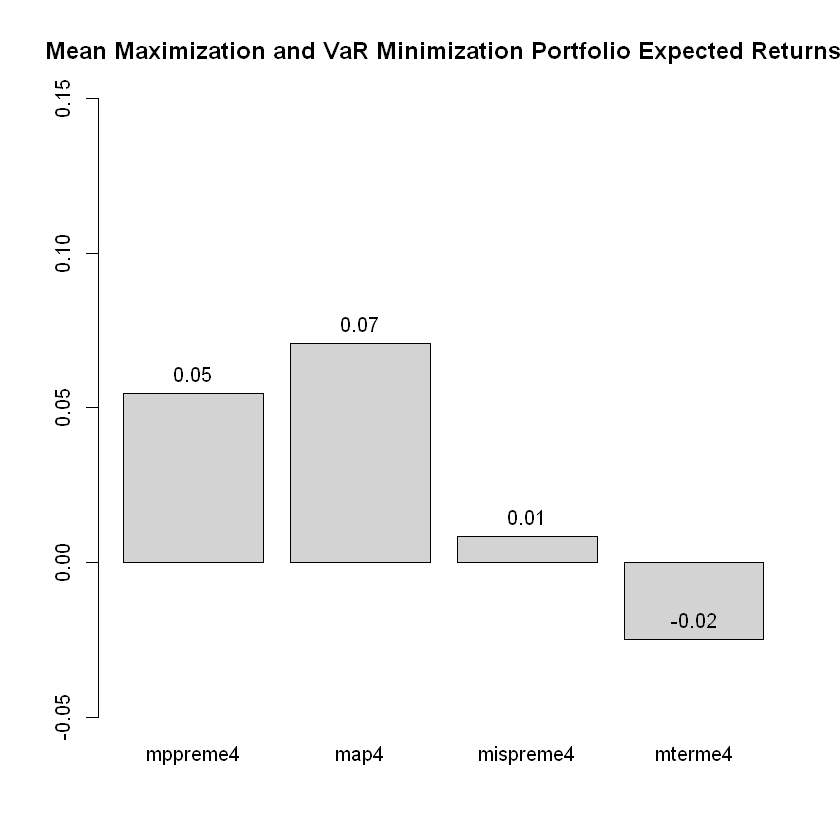

In [32]:
# Mean Maximization and VaR Minimization Portfolio Factors Regression
extractWeights(mportopt4)
mpprem4 <- mport4-mrisk["2015-01-31::"]
mregp4 <- lm(mpprem4~mfactp)
summary(mregp4)

mfactp4 <- cbind(mfactp[,2],mfactp[,3])
colnames(mfactp4) <- c("misprem","mterm")
mregp4f <- lm(mpprem4~mfactp4)
summary(mregp4f)

# Mean Maximization and VaR Minimization Portfolio Expected Returns
map4 <- summary(mregp4f)$coefficients[1]
mispreme4 <- summary(mregp4f)$coefficients[2]*mean(mfactp4[,1])
mterme4 <- summary(mregp4f)$coefficients[3]*mean(mfactp4[,2])
mppreme4 <- map4+mispreme4+mterme4

mportcompe4 <- cbind(mppreme4,map4,mispreme4,mterme4)
colnames(mportcompe4) <- c("mppreme4","map4","mispreme4","mterme4")

mportcompb4 <- mportcompe4*100
bp4 <- barplot(mportcompb4,main="Mean Maximization and VaR Minimization Portfolio Expected Returns",col="lightgray",ylim=c(-0.05,0.15))
text(bp4,mportcompb4,labels=round(mportcompb4,2),pos=3)